# Sentiment Analysis Project

### Group 3
### Members:
        Gideon ochieng
        Ann Mwangi
        Victor Masinde
        Lorna Gatimu
        Charles Odhiambo
### Technical mentor : 
        Maryann Mwikali

## Project Overview
Online business platforms like Amazon generate millions of customer reviews daily, influencing purchasing decisions and shaping brand reputations. These reviews offer valuable insights into customer satisfaction, product quality, and service efficiency. Sentiment analysis, a branch of Natural Language Processing (NLP), enables businesses to analyze and interpret customer emotions from text data. By automating this process, companies can enhance customer experience, improve products, and drive sales.

## Business Understanding
### Real-World Problem
With thousands of reviews per product, customers and businesses struggle to extract meaningful insights manually. The challenge lies in identifying positive, negative, or neutral sentiment efficiently. Traditional rating systems (1-5 stars) may not always reflect the true sentiment behind a review, as users may express mixed opinions in text form. A sentiment analysis system can provide a more accurate and automated way of understanding customer feedback, helping businesses enhance their products and services. 

## Stakeholders
This project is valuable to multiple stakeholders, each benefiting in different ways from sentiment analysis of Amazon reviews data.

1) E-commerce Businesses & Product Sellers

- Gain insights into customer satisfaction and product performance.
- Identify recurring complaints and areas for improvement.
- Monitor brand reputation and respond to negative feedback effectively.

2) Consumers & Online Shoppers
- Get data-driven product recommendations based on real customer sentiments.
- Make informed purchasing decisions by understanding overall product sentiment.
- Avoid misleading star ratings by analyzing actual customer experiences.

3) Marketing & Customer Support Teams
- Track customer sentiment trends to refine marketing strategies.
- Automate review analysis to address complaints and improve customer service.
- Identify key influencers and brand advocates from positive reviews.

In [72]:
import pandas as pd # pandas library for working with the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
! pip install wordcloud

In [74]:
! pip install --upgrade wordcloud


Requirement already up-to-date: wordcloud in c:\users\user\anaconda3\envs\learn-env\lib\site-packages (1.9.4)


In [75]:
pip install "pillow<10.0.0"


Note: you may need to restart the kernel to use updated packages.


In [76]:
import IPython
IPython.display.clear_output()


In [77]:
df=pd.read_csv('Data\shoes_reviews.csv')
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Ecetana Water Shoes for Women Men Quick Dry Be...,Comfortable. Great with jeans and dresses. Dre...,5,5/29/2022,4.581395
1,1,Ecetana Water Shoes for Women Men Quick Dry Be...,"Perfect fit, very comfortable, and I have rece...",5,11/18/2023,4.581395
2,2,Ecetana Water Shoes for Women Men Quick Dry Be...,"Besides, baby, it was exactly what I needed. T...",5,7/7/2021,4.581395
3,3,Ecetana Water Shoes for Women Men Quick Dry Be...,"Excellent, the only thing took on the size mor...",5,7/24/2021,4.581395
4,4,Ecetana Water Shoes for Women Men Quick Dry Be...,"Perfect product, as description… Posting very ...",5,11/4/2021,4.581395


In [78]:
def load_reviews(Data):# function to load all the reviews into a pandas dataframe
    return pd.read_csv(Data)

def merge_reviews(review_files):# function to merge all reviews to one dataframe
    reviews=pd.concat([load_reviews(file) for file in review_files], ignore_index=True)
    return reviews

review_files=['Data/computer_reviews.csv','Data/Fridge_reviews.csv','Data/hoodie_reviews.csv','Data/parfum_reviews.csv','Data/Playstation_reviews.csv','Data/shoes_reviews.csv','Data/toy_reviews.csv','Data/Water_reviews.csv','Data/Xbox_reviews.csv']

df=merge_reviews(review_files)#merging the listed reviews
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


## Data Understanding

In [79]:
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [80]:
df.info()#Structure of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7095 non-null   int64  
 1   product_name    7095 non-null   object 
 2   review_text     7069 non-null   object 
 3   product_rating  7095 non-null   int64  
 4   review_date     7095 non-null   object 
 5   avg_rating      7095 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 332.7+ KB


In [81]:
df.describe()#numerical columns statistics

,Unnamed: 0,product_rating,avg_rating
count,7095.000000,7095.000000,7095.000000
mean,446.683016,3.547710,4.244355
std,309.009040,1.724285,0.612714
min,0.000000,1.000000,1.000000
25%,197.000000,1.000000,4.000000
50%,397.000000,5.000000,4.500000
75%,645.000000,5.000000,4.700000
max,1373.000000,5.000000,5.000000


In [82]:
df.dtypes #datatypes of the columns

Unnamed: 0          int64
product_name       object
review_text        object
product_rating      int64
review_date        object
avg_rating        float64
dtype: object

In [83]:
df.nunique() #number of unique values in each column

Unnamed: 0        1374
product_name       683
review_text       5662
product_rating       5
review_date        945
avg_rating         157
dtype: int64

In [84]:
df['review_text'].unique()

array(['The series S will set you up to game for years.  Add game pass ultimate and for less than the cost of a good lincy you will have hundreds of hours of fun a month.  The S with a terrabyte of storage is the perfect gateway to the world of xbox!',
       "Ordered Xbox series S, received a PS5 controller instead. Called customer service, ended up overseas with some idiot that don't understand what happened. Meanwhile I'm forced to dispute the charges with my credit card company because the idiots in customer service say the package was delivered. I never said I didn't get a delivery...I said you delivered the wrong 💩❗",
       "This product is absolutely amazing, the loading times are great, graphics are wonderful and it is silent. It doesn't sound like a jet engine going off like a PS4. Absolutely love it. This product is absolutely amazing, the loading times are great, graphics are wonderful and it is silent. It doesn't sound like a jet engine going off like a PS4 absolutely love

In [85]:
df.corr()

,Unnamed: 0,product_rating,avg_rating
Unnamed: 0,1.000000,0.006472,-0.204858
product_rating,0.006472,1.000000,0.357765
avg_rating,-0.204858,0.357765,1.000000


In [86]:
df.shape

(7095, 6)

## Data Cleaning

In [87]:
# checking for missing values
df.isnull().sum()

Unnamed: 0         0
product_name       0
review_text       26
product_rating     0
review_date        0
avg_rating         0
dtype: int64

In [88]:
df=df.dropna(subset=['review_text'])#remove rows with missing text
df.isnull().sum()

Unnamed: 0        0
product_name      0
review_text       0
product_rating    0
review_date       0
avg_rating        0
dtype: int64

In [89]:
df =df.drop(columns=['Unnamed: 0'])# dropping the unamed olumn as it is unnecessary
df.head()

,product_name,review_text,product_rating,review_date,avg_rating
0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [90]:
# Convert 'review_date' to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 0 to 7094
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_name    7069 non-null   object        
 1   review_text     7069 non-null   object        
 2   product_rating  7069 non-null   int64         
 3   review_date     7069 non-null   datetime64[ns]
 4   avg_rating      7069 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 331.4+ KB


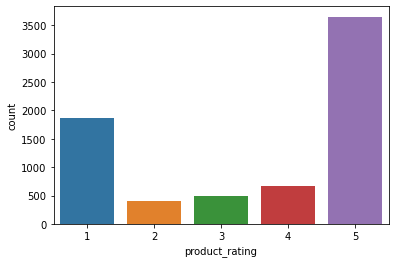

In [92]:
sns.countplot(data=df, x='product_rating')
plt.show()

In [93]:
# defining a function to clean raw text
import re


def clean_text(text):

  # removing html tags 
  text = re.sub(r'<.*?>', '', text)

  # remove urls
  text = re.sub(r'http\s+|www\S+', '', text)

  # removing non_alphabetic characters and converting to lowercase

  text= re.sub(r'[^a-zA_Z\s]', '', text.lower())

  return text

In [94]:
df['cleaned_reviews'] = df['review_text'].apply(clean_text)

In [95]:
# initializing stopwords and lammetizer
stopwords = set(stopwords.words('english'))
lammatizer = WordNetLemmatizer()

In [96]:
def preprocess_text(text):
  """
  Tokenize cleaned text, remove stopwords and perform lammatization
  """

  tokens = text.split()

  tokens = [lammatizer.lemmatize(word) for word in tokens if word not in stopwords]

  return ' '.join(tokens)

In [97]:
df['preprocessedText'] = df['cleaned_reviews'].apply(preprocess_text)

In [98]:
all_text = " ".join(df['preprocessedText'])


In [99]:
word_count = Counter(all_text.split())
most_commons = word_count.most_common(20)
# Creating dataframe for easy visualization

most_common_df = pd.DataFrame(most_commons, columns=['word', 'count'])
most_common_df.head()

,word,count
0,one,1593
1,like,1541
2,great,1493
3,love,1449
4,get,1285


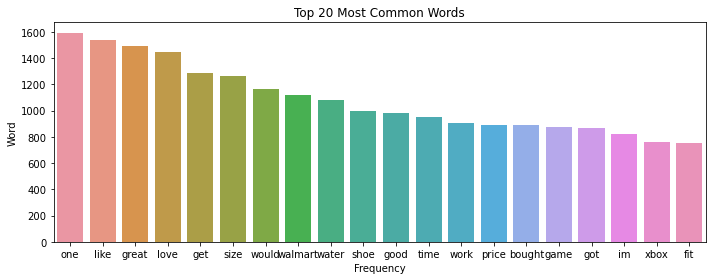

In [100]:
#visualization
plt.figure(figsize=(10,4))
sns.barplot(x='word', y = 'count' ,data = most_common_df)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Common Words")
plt.tight_layout()
plt.show()

In [101]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [ ]:
df['review_length'] = df['review_text'].apply(lambda x:len(x.split()))

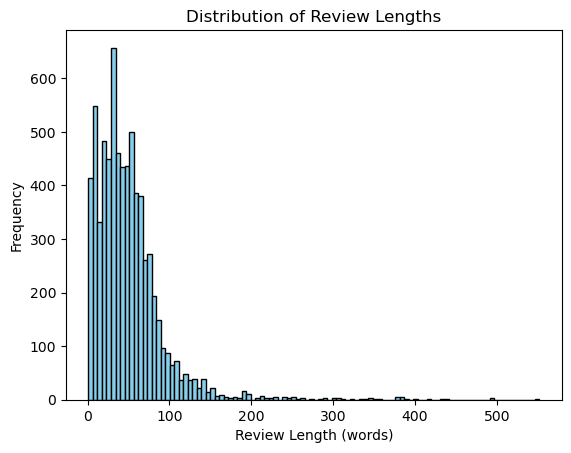

In [ ]:
plt.hist(df["review_length"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

<ipython-input-53-335868f484a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year_month"] = df_filtered["review_date"].dt.to_period("M")


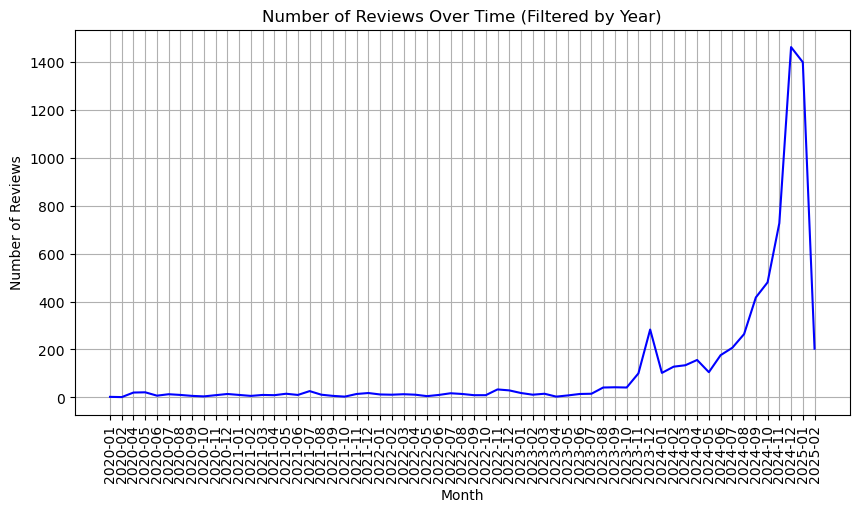

In [ ]:
# Convert review_date to datetime format
df["review_date"] = pd.to_datetime(df["review_date"])

# Define the valid year range
min_year = 2020
max_year = 2025

# Extract year and filter data
df["year"] = df["review_date"].dt.year
df_filtered = df[(df["year"] >= min_year) & (df["year"] <= max_year)]

# Extract year-month for
# Extract year-month for grouping
df_filtered["year_month"] = df_filtered["review_date"].dt.to_period("M")

# Count reviews per month
reviews_per_month = df_filtered["year_month"].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10,5))
plt.plot(reviews_per_month.index.astype(str), reviews_per_month.values, linestyle="-", color="b")

# Formatting
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time (Filtered by Year)")
plt.grid(True)

# Show plot
plt.show()

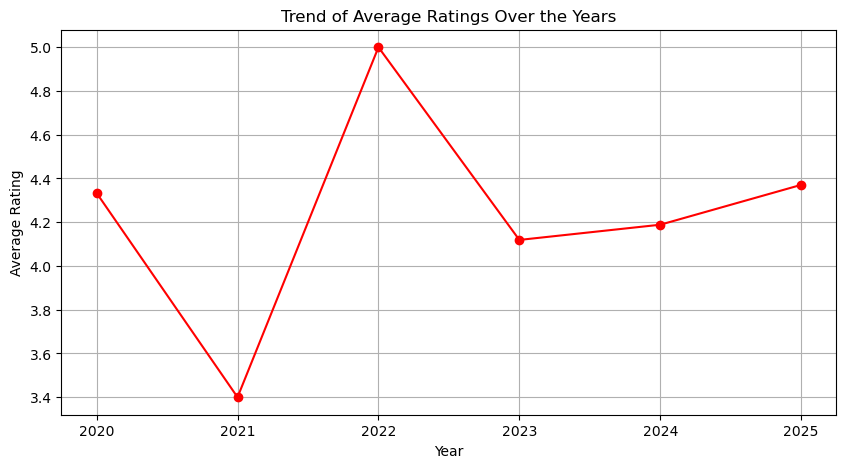

In [ ]:
# Compute average rating per year
avg_rating_per_year = df_filtered.groupby("year")["product_rating"].mean()

# Plot rating trends over time
plt.figure(figsize=(10,5))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, marker="o", linestyle="-", color="r")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Trend of Average Ratings Over the Years")
plt.grid(True)
plt.show()

<ipython-input-57-94ba54344159>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["product_rating"] = pd.to_numeric(df_filtered["product_rating"], errors='coerce')


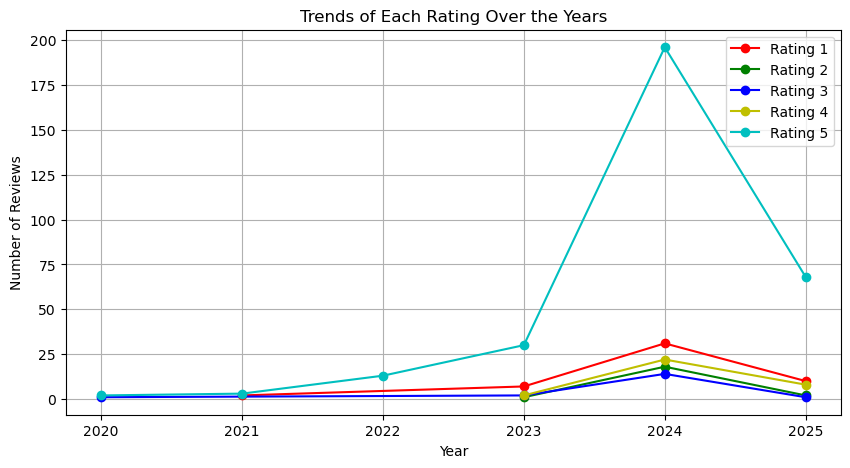

In [ ]:
# Ensure product_rating is numeric
df_filtered["product_rating"] = pd.to_numeric(df_filtered["product_rating"], errors='coerce')

# Plot trends for each rating (1-5 stars) on the same figure
plt.figure(figsize=(10,5))
colors = ['r', 'g', 'b', 'y', 'c']
for rating, color in zip(range(1, 6), colors):
    rating_trend = df_filtered[df_filtered["product_rating"] == rating].groupby("year").size()
    plt.plot(rating_trend.index, rating_trend.values, marker="o", linestyle="-", label=f"Rating {rating}", color=color)

plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Trends of Each Rating Over the Years")
plt.legend()
plt.grid(True)
plt.show()